In [46]:
# system of equation integration tapezium and simpson
import numpy as np
from scipy.integrate import odeint,quad
import  matplotlib.pyplot as plt 

In [ ]:
# system of equations
# create matrix
# A=np.array([[1,-2,-1,6],[2,2,-1,-7],[-1,-1,2,5],[-3,4,2,5]])
# b=np.array([4,-4,5,8])
# Z=np.linalg.solve(A,b)
            # check how to extract individual values
# ==================================================================================
#================================================================================
#                 non linear systems
#=================================================================================

*Exercise 5**
Write a python code to solve the following system of non linear equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [48]:
# import numpy as np
from scipy.optimize import fsolve
def myFunction(z):
    x = z[0]
    y = z[1]
#     x,y=z
    F = np.empty((2))# number of variables
    F[0] = x**2+y+x-4
    F[1] = 2*np.exp(x)+3*y-14
#     F=np.array([F[0],F[1]])
    return F
zGuess = np.array([0,0]) # check if given 
z = fsolve(myFunction,zGuess)
print("x=",z[0])
print("y=",z[1])# check how to extract individual values

x= 5.13108676346246e-16
y= 3.999999999999999


**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [ ]:
# from scipy.integrate import quad
a1 = 0
b1= 2
f = lambda x: (x**3+5*x-20)/(x**2+3)
A = quad(f, a1, b1)[0]
print("A=", A)

a2 = 3
b2 = 5
f = lambda x: (x-1/3)*(x**4-3)**(1/2)
B = quad(f, a2, b2)[0]
print("B=", B)

2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [ ]:
# import numpy as np
def Trap(a,b,f,H=0.001):
    N=int((b-a)/H)
    x=np.linspace(a,b,N+1)
    Z=0
    for i in range(1,N+1):
        Z=Z+H*(f(x[i-1])+f(x[i]))/2
    return Z
# f=lambda x: (x**3+5*x-20)/(x**2+3)
# print("A=", Trap(0,2,f))

# f = lambda x: (x-1/3)*(x**4-3)**(1/2)
# print("B=", Trap(3,5,f))

 Use Simpson’s Rule to approximate $$\int\sin(x)dx  \text{ on } [0,\pi]$$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.

In [47]:
# a = 0
# b = np.pi
# n = 11
# exa=2
# h = (b - a) / (n - 1)
# x = np.linspace(a, b, n)
# f = np.sin(x)

# I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
#             + 4*sum(f[1:n-1:2]) + f[n-1])
# err_simp = exa- I_simp

# print(I_simp)
# print(err_simp)
# ==========================================

# Simpson's 1/3 Rule

# Define function to integrate

def f(x):
    return np.sin(x)

# Implementing Simpson's 1/3 
def simpson13(x0,xn,n):
    # calculating step size
    h = (xn - x0) / n
    
    # Finding sum 
    integration = f(x0) + f(xn)
    
    for i in range(1,n):
        k = x0 + i*h
        
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)
    
    # Finding final integration value
    integration = integration * h/3
    
    return integration
    
# Input section
lower_limit = float(input("Enter lower limit of integration: "))
upper_limit = float(input("Enter upper limit of integration: "))
sub_interval = int(input("Enter number of sub intervals: "))

# Call simpson() method and get result
result = simpson13(lower_limit, upper_limit, sub_interval)
print("Integration result by Simpson's 1/3 method is: %0.6f" % (result) )

Enter lower limit of integration: 0
Enter upper limit of integration: 3.14
Enter number of sub intervals: 11
Integration result by Simpson's 1/3 method is: 1.986248


# ODES


In [1]:
#ODES
import numpy as np
from scipy.integrate import odeint
import  matplotlib.pyplot as plt 

In [ ]:
#ONE VARIABLE ODE
def fun(z,t):
    v=z
    dvdt=a*v**2+b 
    return dvdt
a=3
b=-5
#initial condition
v0= 0
# time
t= np.linspace(0,1,100)
#solve 
z=odeint(fun,v0,t)
# print(sol)


In [ ]:
#TWO VARIABLES
def tfun(z,x):
    y1,y2=z
    dy1dx=y1+y2**2+3*x
    dy2dx=3*y1+y2**3-np.cos(x)
    return np.array([dy1dx,dy2dx])
# inital condition
z0= [0,0]
#time space x
x=np.linspace(0,1,100)
# solve
z= odeint(tfun,z0,x)
# y1,y2=z[:,0] #returns y1
# y2=z[:,1] #retuns y2

plt.plot(x,z)
# plt.plot(x,y2)
plt.show()

In [ ]:
#HIGHER ORDER
def second(z,t):
    x,u=z
    dxdt=u
    dudt=-u**2+np.sin(x)
    return np.array([dxdt,dudt])
# initial conditions
z0=[0,5]
# time 
t= np.linspace(0,1,100)
# solve
z=odeint(second,z0,t)
# plot
plt.plot(t,z)

$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [16]:
def odint(z,t):
    x1,x2,x3=z
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt,dx2dt,dx3dt])


N=200
a,b=0,4

# initial conditions
z0=[1,1,1]
t= np.linspace(a,b,N)
# solve
z=odeint(odint,z0,t)
z.shape

(200, 3)

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


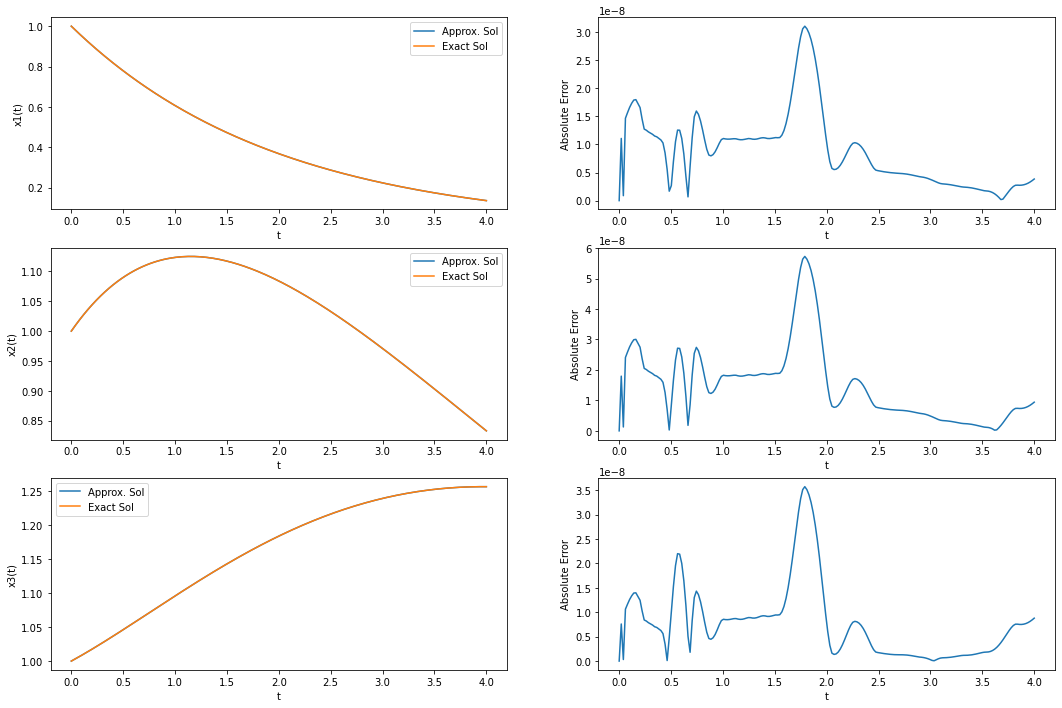

In [17]:
X1=lambda t:np.exp(-t/2)
X2=lambda t:-2*np.exp(-t/2)+3*np.exp(-t/4)
X3=lambda t:(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)

plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
plt.plot(t, z[:, 0], label='Approx. Sol')
plt.plot(t, X1(t), label='Exact Sol')
plt.xlabel('t')
plt.ylabel('x1(t)')
plt.legend()


plt.subplot(3, 2, 2)
plt.plot(t, abs(z[:, 0] - X1(t)))
plt.xlabel('t')
plt.ylabel('Absolute Error')

plt.subplot(3, 2, 3)
plt.plot(t, z[:, 1], label='Approx. Sol')
plt.plot(t, X2(t), label='Exact Sol')
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(t, abs(z[:, 1] - X2(t)))
plt.xlabel('t')
plt.ylabel('Absolute Error')

plt.subplot(3, 2, 5)
plt.plot(t, z[:, 2], label='Approx. Sol')
plt.plot(t, X3(t), label='Exact Sol')
plt.xlabel('t')
plt.ylabel('x3(t)')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(t, abs(z[:, 2] - X3(t)))
plt.xlabel('t')
plt.ylabel('Absolute Error')

plt.show()

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


# euler, range kuta, matrix maker

In [26]:
def EulerOdeSys(f,c,t):
    H = t[1]-t[0]#last value - first
    N=len(t)
    M=len(c)
    Z= np.zeros((N,M))
    z[0]=c
    for k in range(N-1):
        Z[k+1]=Z[k]+H*f(Z[k],t[k])
    return Z


2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}


2b. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}


In [27]:
def RK4OdeSys(f, c, t):
    H = t[1] - t[0]
    Z = np.zeros((len(t), len(c)))
    Z[0] = c
    for k in range(N-1):
        k1 = f(Z[k], t[k])
        k2 = f(Z[k] + H*0.5*k1, t[k] + 0.5*H)
        k3 = f(Z[k] + H*0.5*k2, t[k] + 0.5*H)
        k4 = f(Z[k] + H*k3, t[k] + H)
        Z[k+1] = Z[k] + (H/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return Z
# python function RK2Method
# def  RK2Method(a,b,c,N,f):
#     h=(b-a)/N
#     x=np.linspace(a,b,N+1)
#     y=np.zeros(N+1)
#     y[0]=c
#     for i in range(N):
#         alpha=f(x[i],y[i])
#         y[i+1]=y[i]+h*f(x[i]+h/2,y[i]+(h/2)*alpha)
#     return x,y

3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [28]:
z0 = np.array([1,1,1])
a, b, N = 0, 4, 200
t = np.linspace(a, b, N)

z_eul = EulerOdeSys(odint, z0, t)
z_rk4 = RK4OdeSys(odint, z0, t)

z_eul.shape, z_rk4.shape

((200, 3), (200, 3))

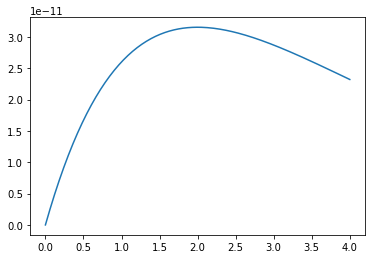

In [30]:
# plt.plot(t, abs(z[:, 0] - X1), label='odeint')
# plt.plot(t, abs(z_eul[:, 0] - X1), label='euler')
plt.plot(t, abs(z_rk4[:, 0] - X1(t)), label='RK4')
# plt.xlabel('t'); plt.ylabel('Absolute Error')
# plt.legend()

plt.show()

4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

$\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}$


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

$\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}$
where $ x_{i+1/2} = x_i+H/2 $ .
Note that the system $ \eqref{secode} $ takes the form 
$$ AU = b $$.
a. Write a Python function  </b> MatGenerator1 </b>  that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
# import numpy as np
def MatGenerator(a,b,lam,alp,beta,N,g):
    B=np.zeros(N+1)# create vector b
    B[0]=alp
    B[N]=beta## specify firat and last elements in b
    h=(b-a)/N
    x=np.linspace(a,b,N+1)

    B[1:N]=(h**2/lam**2)*g(x[1:N])##extracts mid elements of b and replaces them with g(x_i)
  
    A=np.eye(N+1,N+1)# creates matrics
    A[1,0]=-1
    A[N-1,N-1]=-1
    A[1:N,1:N]=-np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

In [ ]:
g=lambda x: -4*(1+x)*np.exp(x)
A,B=MatGenerator(0,1,1,-4,0,100,g)
U=np.linalg.solve(A,B)
print(U)
x=np.linspace(0,1,101)
import matplotlib.pyplot as plt
plt.plot(x,U)
plt.title("Approximative solution")
plt.xlabel('x')
plt.ylabel('Uapp')
plt.grid()
plt.show()

**Exercise 4** <font color=red>(21/21) **_Excellent_** </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

# KALMAN FILTER 

In [5]:
# one dimensional process model
import matplotlib.pyplot as plt
import numpy as np
#np.random.seed(10)
def process(al, N, q):
                    ##define an array x(vector)
    x=np.zeros(N+1)
                    ## replace the first entry in vector
    x[0]= np.random.normal(0,1)
                    ##use loop to replace the other entries by iterating
    for i in range (1,N+1):
        delta=np.random.normal(0,q)
        x[i]=al*x[i-1]+delta
    return x

def Data(x, r, h):
    N= len(x)-1 # remove one to eliminate the initial
    eps= np.random.normal(0, r, N)
    y= h*x[1:]+eps
    return y
x=process(0.8, 30, 0.4)
y=Data(x,0.1,1)
y

array([ 0.0848043 ,  0.13709072, -0.14003627, -0.2579804 ,  0.65562716,
        0.46373845,  1.08208189,  0.72339239,  0.53800405,  0.78814948,
        0.82992394,  1.30692445,  1.18427219,  0.97102559,  0.91222191,
        0.45267187,  0.10266653,  0.62033092,  0.12919549, -0.18011504,
       -0.76189272, -0.34914732, -0.48407864, -0.10191291,  0.26006549,
       -0.48937059, -0.65273423, -1.0651371 , -1.34003078, -1.1728735 ])

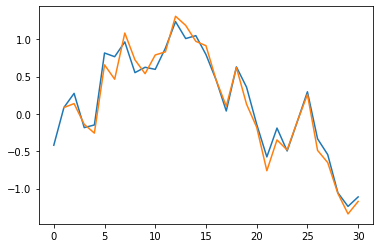

In [6]:
plt.plot(np.arange(0,len(x)),x)
plt.plot(np.arange(1,len(x)),y)
plt.show()

In [7]:
# FILTERS AT WORK
def fs(al,N,q,h,r):
    mu_old=np.empty(N)
    mu_new=np.empty(N)
    k=np.empty(N+1)
    k[0]=h*(q+al**2)*(h**2*(q+al**2)+r)**(-1)
    sigma_new=np.empty(N)
    sigma_old=np.empty(N)
    sigma_old[0]= q+al**2
    sigma_new[0]=(1-k[1]+h)*(q+al**2)
    mu_new[0]=k[1]*y[1]-k[1]*h*(q+al**2)
    mu_old[0]=0
    
    for i in range(1,N):
        mu_old[i]=al*mu_new[i-1]
        sigma_old[i]=q+al*sigma_new[i-1]*al
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i]=(1-k[i]*h)*sigma_old[i]
        
    return mu_new ,sigma_new, mu_old, sigma_old
mu_new, sigma_new, mu_old, sigma_old= fs(0.8,30,0.4,1,0.1) 
print("forcasted are",mu_new, sigma_new)
print("filtred are",mu_old, sigma_old)

forcasted are [-0.90290928  0.0633589  -0.10588762 -0.22662158  0.50412491  0.45279766
  0.95177326  0.73027603  0.54637037  0.7246006   0.78462399  1.18396873
  1.14135203  0.96053637  0.88619203  0.49906489  0.15635545  0.53067966
  0.18266046 -0.12105732 -0.64150361 -0.37884523 -0.45131295 -0.14882287
  0.19143518 -0.37305961 -0.58860005 -0.95756261 -1.23612679 -1.13957024] [1.04       0.09142073 0.08209519 0.08190179 0.08189774 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765]
filtred are [ 0.         -0.72232742  0.05068712 -0.08471009 -0.18129726  0.40329993
  0.36223813  0.76141861  0.58422082  0.4370963   0.57968048  0.62769919
  0.94717498  0.91308162  0.7684291   0.70895362  0.39925191  0.12508436
  0.42454373  0.14612837 -0.09684586 -0.51320289 -0.3

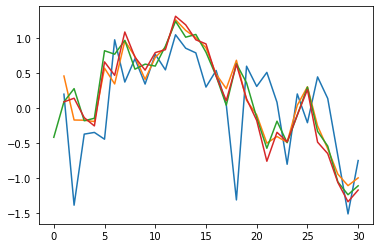

In [8]:
plt.plot(np.arange(1,len(x)),np.random.normal(mu_old,sigma_old))
plt.plot(np.arange(1,len(x)),np.random.normal(mu_new,sigma_new))
plt.plot(np.arange(0,len(x)),x)
plt.plot(np.arange(1,len(x)),y)


plt.show()

# seaborn here

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
#LOADING data set start by  assgning name
titanic_df = sns.load_dataset("titanic") 

In [ ]:
#check if the has nulls 
print(titanic_df.shape)
print(titanic_df.info())
titanic_df.head()# return first five
titanic_df.isnull().sum()# rturns number of mising values in each column
titanic_df.drop(columns=['deck'], inplace=True)#drops the column and makes changes in the original data
titanic_df.dropna(axis=0, inplace=True)#drops raws containihg nul (clean) data
titanic_df.shape
titanic_df.groupby(by=["survived", "sex"]).count().iloc[2,0]
titanic_df.groupby(by=["sex", "survived"])["age"].mean()[2]

# PLOTS IN SEABORN
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sns.boxplot(x="sex", y="age", hue="who", data=titanic_df)

plt.subplot(2,2,2)
sns.scatterplot(x="age", y="fare", data=titanic_df)

plt.subplot(2,2,3)
sns.barplot(x="pclass", y="age", hue="alone", data=titanic_df)

plt.show()

In [ ]:
# load the diamonds dataset from seaborn package
DMD= sns.load_dataset('diamonds')
DMD.head()

# CHECK YOUR DATA
print(DMD.shape)
print(DMD.info())

# how many columns in this dataset? 
len(DMD.columns)
# DMD.columns.size

# list the names of all columns and describe the datatype of each column? 
for clmn in DMD.columns:
    print((clmn,DMD[clmn].dtype))
    
# list the unique number of diamond colors in this dataset? 
list(DMD['color'].values.unique())

#  what is the minimum depth of diamond?
DMD['depth'].min()

#  count the diamonds by their clarity and cut? 
number=DMD.groupby(by=['clarity','cut']).count()#.iloc[:,0]
number['number']=number.x.values
number.loc[:,["number"]]


# list the color, clarity, and prices of the most expensive diamond? 
DMD= sns.load_dataset('diamonds')
most_exp= DMD['price'].max()
DMD[DMD['price']==most_exp][['color','clarity','price']]


# plot 
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(1,2,1)
sns.violinplot(x='cut',y='price',data=DMD)
plt.subplot(1,2,2)
sns.scatterplot(x='x',y='price',hue='cut',data=DMD)

# 1. Data Structure
## 1.1 <b> Pandas Series </b>
- A 1-dimensional labeled array
- Supports many data types
- Axis labels $\rightarrow$ index (get and set values by index label)
- Valid argument to most NumPy
methods

In [2]:
data0 = pd.Series(data = [1,2,3.,4,5,6,7,8])
data0

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [3]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(data = [1,2,3.,4,5,6,7,8,9], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'])
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

In [10]:
data1.index
data1[4]
data1[[2,4,5]]
data1['a']
'a' in data1
data1*3
# data1**3
# data1/2
# data1

a     3.0
b     6.0
c     9.0
d    12.0
e    15.0
f    18.0
g    21.0
h    24.0
a    27.0
dtype: float64

##  1.2. <b>DataFrame </b>
- A 2-dimensional labeled data
structure
- A dictionary of Series objects
    - Columns can be of potentially
different types
- Optionally parameters for fine-tuning:
    - index (row labels)
    - columns (column labels)

Pandas provides many constructors to create DataFrames!

In [20]:
datak= {"Age": pd.Series(data=[20, 22,24,32],
                         index=["nadine","samson","perie","khald"]),
        "height": pd.Series(data=[120,150,162,187],
                            index=["nadine","samson","perie","khald"]),
       "genda":pd.Series (data=["f","m","m","m"],
                           index=["nadine","samson","perie","khald"])}
datak=pd.DataFrame(datak)
datak

,Age,height,genda
nadine,20,120,f
samson,22,150,m
perie,24,162,m
khald,32,187,m


In [33]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [34]:
data2.index
data2.columns

Index(['GradeS1', 'GradeS2'], dtype='object')

In [35]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics'])#Create another data frame with some index of data2
d

,GradeS1,GradeS2
Maths,70.0,90.0
Physics,98.0,88.0
Economics,NaN,76.0


In [36]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics', 'elvira'], 
                columns= ('Grade12', 'GradeS2','GradeS1'))
d

,Grade12,GradeS2,GradeS1
Maths,NaN,90.0,70.0
Physics,NaN,88.0,98.0
Economics,NaN,76.0,NaN
elvira,NaN,NaN,NaN


# 2. Reading and Writing Data

## 2.1 <b> pandas: Data Ingestion (Reading) </b>
- Functions such as <font color = red> ‘read_excel’, ‘read_csv’, 'read_json', 'read_html', 'read_sql_query', 'read_sql_table' </b>, etc.

<b> Syntax: pandas.function(file_directory) </b>

In [37]:
ddat = pd.read_excel('Climate_Dynamics.xlsx')
ddat
ddat.head()
ddat.head(3)
ddat.tail()

,Unnamed: 0,Quiz 1,Unnamed: 2,Quiz 2,Unnamed: 4,Bonus,Assignment 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Assignment 2,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Extended Quiz,Final Mark,Grade,Unnamed: 18
29,Remy Twiringiyimana,8.0,80,8.0,80,3.0,9.5,28.5,54.0,92,18.0,20.0,28.0,28.0,96,92.0,90.8,Distinction,Remy Twiringiyimana
30,Romain Akpahou,8.0,80,8.0,80,10.0,9.5,29.0,55.0,93.5,20.0,20.0,17.0,30.0,91,90.0,89.35,Distinction,Romain Akpahou
31,Yao Gahounzo,6.0,60,6.0,60,10.0,9.5,29.0,55.0,93.5,15.0,20.0,28.0,30.0,97,86.0,86.35,Distinction,Yao Gahounzo
32,Zeinab Hesham Abd El-ghany,9.0,90,9.0,90,17.0,9.5,29.0,56.0,94.5,20.0,20.0,17.0,30.0,91,77.0,89.05,Distinction,Zeinab Hesham Abd El-ghany
33,Titus,7.0,70,7.0,70,22.0,10.0,29.5,56.0,95.5,15.0,20.0,17.0,30.0,91,89.0,87.75,Distinction,Titus


In [38]:
ddatt = pd.ExcelFile('DefenseSchedule2020forTutors.xlsx')
sheet1_df = pd.read_excel(ddatt, 'For Examiners ')
sheet2_df = pd.read_excel(ddatt, 'For Tutors ')
sheet1_df.head(2)
# sheet2_df.head(3)

,Unnamed: 0,Wednesday 3rd June,Examiner,Thursday 4th June,Unnamed: 4,Friday 5th June,Unnamed: 6,Unnamed: 7,Monday 8th June,Unnamed: 9,Tuesday 9th June,Unnamed: 11,Wednesday 10th June,Unnamed: 13
0,09:00:00,Angela Nyangate John,Patrice Takam,Yao Gahounzo,Stive,NaN,NaN,NaN,Patrick Pam Peter,Hove,Zeinab,Bourgeois,Leontine,Bemsibom
1,09:30:00,Mohamed Maysara Hassan Yagob,Antoine Bogso,Martin De Pores Barindirimana,Denis Ndanguza,Mulengo Kanzoka,Lydie (UR),NaN,Remy Mugenda Ineza,Hove,Dimitri,Erick Tetsadjio,Jean de Dieu,Bamba


In [39]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")#JavaScript Object Notation
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


In [40]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [41]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
data.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


## 2.2. Data writing

Save the dataframe in the current directory

# saving processed data impotant

In [18]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
#===================saving data=======================
# index = False parameter will not write the index values, default is True
#data2.to_csv('data_new.csv', index=True)
#data2.to_csv('data_new.txt', sep='\t', index=True)
# data2.to_excel('data_new.xlsx',sheet_name='Sheet1', index = False)
data2.head()# return  fist 5
# data2.tail()# return  last 5

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0


<b>Create a folder in the current directory and save the dataframe inside</b>

In [43]:
#==============================================
# create a folder if it not exists
Name_of_folder = 'dbasc'
import os
if not os.path.exists(Name_of_folder):
    os.makedirs(Name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data2.to_csv(Name_of_folder+'/data_new.csv', index=False)
# data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

In [44]:
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

# 3. Basic Statistics Summary
<b> pandas in Descriptive Statistics </b>
Functions such as 'describe()', 'corr()', 'min()', 'max()', 'mode()', 'median()', 'std()', etc.

<b> Syntax : data_frame.function() </b>

In [ ]:
#data1
data1.describe() # return statics of numerical values 

count    9.000000
mean     5.000000
std      2.738613
min      1.000000
25%      3.000000
50%      5.000000
75%      7.000000
max      9.000000
dtype: float64

In [ ]:
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [ ]:
data2.describe()

,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [ ]:
data2.loc['Maths',:].describe()

count     2.000000
mean     80.000000
std      14.142136
min      70.000000
25%      75.000000
50%      80.000000
75%      85.000000
max      90.000000
Name: Maths, dtype: float64

In [ ]:
data2.corr()

,GradeS1,GradeS2
GradeS1,1.000000,-0.090784
GradeS2,-0.090784,1.000000


In [ ]:
data2.max()

GradeS1    98.0
GradeS2    90.0
dtype: float64

In [ ]:
data2.cov()# 

,GradeS1,GradeS2
GradeS1,329.2,-14.000000
GradeS2,-14.0,56.142857


In [ ]:
data2.std()

GradeS1    18.143869
GradeS2     7.492854
dtype: float64

In [ ]:
data2.mean()

GradeS1    73.800000
GradeS2    80.857143
dtype: float64

In [ ]:
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


# 4. Viewing Data

In [24]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

,Col1,Col2,Col3
a,1,4,Euler
b,-2,-3,A
c,3,7,A
d,1,8,Euler
e,5,9,A
f,6,5,A
g,1,6,RK4
h,-3,4,A
i,1,-2,Euler
j,1,2,RK4


## 4.1 The characteristics of a dataframe

In [28]:
df.columns       #Get column names 
df.index         # Get dataframe index 
df.values        # Get values
# df.dtypes        # Get column datatypes
# df.shape



array([[1, 4, 'Euler'],
       [-2, -3, 'A'],
       [3, 7, 'A'],
       [1, 8, 'Euler'],
       [5, 9, 'A'],
       [6, 5, 'A'],
       [1, 6, 'RK4'],
       [-3, 4, 'A'],
       [1, -2, 'Euler'],
       [1, 2, 'RK4']], dtype=object)

## 4.2 Access, slice and update the values of a dataframe
To access, slice or update the value of a dataframe one can use the methods <b>loc or iloc</b>.

<b>loc</b> gets rows (or columns) with particular labels from the index. <b>iloc</b> gets rows (or columns) at particular positions in the index (so it only takes integers). 
### 4.2.1 Selecting pandas data using “iloc”

The <b>iloc</b> indexer for Pandas Dataframe is used for <b>integer-location based indexing / selection by position</b>.

The iloc indexer syntax is 
$$\text{data.iloc[<row selection>, <column selection>]},$$ 

which is sure to be a source of confusion for R users. <b>iloc</b> in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (<b>data.shape[0]</b>)  and <b>iloc[...]</b> allows selections based on these numbers. The same applies for columns (ranging from 0 to <b>data.shape[1]</b>)

There are two “arguments” to iloc – a row selector, and a column selector.  For example:

In [33]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.head(5)

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [35]:
# # Single selections using iloc and DataFrame
# # Rows:
# data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
# data.iloc[1] # second row of data frame (Evan Zigomalas)
# data.iloc[-1] # last row of data frame (Mi Richan)
# # # Columns:
data.iloc[:,0] # first column of data frame (first_name)
# data.iloc[:,1] # second column of data frame (last_name)
# data.iloc[:,-1] # last column of data frame (id)

0        Aleshia
1           Evan
2         France
3        Ulysses
4         Tyisha
         ...    
495        Avery
496         Reid
497    Charlette
498    Celestina
499           Mi
Name: first_name, Length: 500, dtype: object

<b>Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.</b>


In [48]:
data.iloc[:,[-1]] # last column of data frame (id)

,id
0,969
1,207
2,824
3,772
4,48
...,...
495,188
496,86
497,584
498,548


Multiple columns and rows can be selected together using the <b>.iloc</b> indexer.

In [49]:
# # Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


,county,postal,phone1
0,Kent,CT2 7PP,01835-703597
1,Buckinghamshire,HP11 2AX,01937-864715
2,Bournemouth,BH6 3BE,01347-368222
3,Lincolnshire,DN36 5RP,01912-771311
4,West Midlands,B70 9DT,01547-429341


### 4.2.2. Selecting pandas data using “loc”

The Pandas loc indexer can be used with DataFrames for two different use cases:

    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: 
$$\text{data.loc[<row selection>, <column selection>]}$$

#### a. Label-based / Index-based indexing using .loc

Selections using the loc method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <b>df.set_index()</b>, the .loc method directly selects based on index values of any rows. For example, setting the index of our test data frame to the persons “last_name”:

In [37]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.set_index("last_name", inplace=True)
data.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Now with the index set, we can directly select rows for different “last_name” values using <b>.loc[<label>]</b>  – either singly, or in multiples. For example:

In [38]:
data.loc['Veness']
# data.loc[['Andrade','Veness']]

first_name                              Tyisha
company_name                    Champagne Room
address                      5396 Forth Street
city                Greets Green and Lyng Ward
county                           West Midlands
postal                                 B70 9DT
phone1                            01547-429341
phone2                            01290-367248
email                tyisha.veness@hotmail.com
web             http://www.champagneroom.co.uk
id                                          48
Name: Veness, dtype: object

<b> Selecting single or multiple rows using .loc index selections with pandas. Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.</b>

In [52]:
data.loc[['Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Select columns with <b>.loc</b> using the names of the columns.

In [53]:
data.loc[['Andrade','Veness'], ['first_name','address','city']]

,first_name,address,city
last_name,,,
Andrade,France,8 Moor Place,East Southbourne and Tuckton W
Veness,Tyisha,5396 Forth Street,Greets Green and Lyng Ward


When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

You can select ranges of index labels – the selection <b>data.loc['Bruch':'Julio']</b> will return all rows in the data frame between the index entries for <b>'Bruch'</b> and <b>'Julio'</b>. The following examples should now make sense:

In [54]:
# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'
data.loc[['Andrade', 'Veness'], 'city':'email']
# # Select all rows between 'Andrade' and 'Veness', with just 'first_name', 'address' and 'city' columns
data.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
# # Select all rows between 'Andrade' and 'Veness', with all columns between 'city' and 'email' 
data.loc['Andrade':'Veness', 'city':'email']

,city,county,postal,phone1,phone2,email
last_name,,,,,,
Andrade,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com
Mcwalters,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com
Veness,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com


Note that in the last example, <b>data.loc[207]</b> (the row with index value 207) is not equal to <b>data.iloc[207]</b> (the 207th row in the data)

In [39]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# Change the index to be based on the 'id' column
data.set_index('id', inplace=True)
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
969,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
824,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
772,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
48,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [40]:
i = data.index[1]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i]]

i =  207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
207,Eva,Joulwan,Central Hrdwr & Elec Corp,7 Lear Rd,Stroud,Hampshire,GU32 3PQ,01779-720349,01961-802899,eva.joulwan@gmail.com,http://www.centralhrdwreleccorp.co.uk
207,Allene,Burau,Allied Plastics,8 Barlow St #6,Barlow,Derbyshire,S18 7TH,01731-825958,01260-963065,allene.burau@hotmail.com,http://www.alliedplastics.co.uk


In [41]:
data.iloc[[i]]

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
876,Madalyn,Dubberly,L & M Industrial Chemicals Inc,1 Lower Burlington St,Northfleet South Ward,Kent,DA11 8RN,01974-720949,01910-745476,madalyn.dubberly@gmail.com,http://www.lmindustrialchemicalsinc.co.uk


### b. Boolean / Logical indexing using .loc

Conditional selections with boolean arrays using $\text{data.loc[<selection>]}$ is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the <b>.loc</b> indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

For example, the statement $$\text{data[‘first_name’] == ‘Antonio’]}$$ produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the <b>.loc</b> indexer as so:

In [58]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.set_index("last_name", inplace=True)

data.loc[data['first_name'] == 'Antonio']


,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Villamarin,Antonio,Combs Sheetmetal,353 Standish St #8264,Little Parndon and Hare Street,Hertfordshire,CM20 2HT,01559-403415,01388-777812,antonio.villamarin@gmail.com,http://www.combssheetmetal.co.uk,978
Glasford,Antonio,Saint Thomas Creations,425 Howley St,Gaer Community,Newport,NP20 3DE,01463-409090,01242-318420,antonio_glasford@glasford.co.uk,http://www.saintthomascreations.co.uk,489
Heilig,Antonio,Radisson Suite Hotel,35 Elton St #3,Ipplepen,Devon,TQ12 5LL,01324-171614,01442-946357,antonio.heilig@gmail.com,http://www.radissonsuitehotel.co.uk,568


As before, a second argument can be passed to .loc to select particular columns out of the data frame. Again, columns are referred to by name for the loc indexer and can be a single string, a list of columns, or a slice “:” operation.

In [59]:
data.loc[data['first_name'] == 'Antonio', ['email', 'address','city']]

,email,address,city
last_name,,,
Villamarin,antonio.villamarin@gmail.com,353 Standish St #8264,Little Parndon and Hare Street
Glasford,antonio_glasford@glasford.co.uk,425 Howley St,Gaer Community
Heilig,antonio.heilig@gmail.com,35 Elton St #3,Ipplepen


Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:

In [60]:
data.loc[data['first_name'] == 'Antonio', 'email']
data.loc[data['first_name'] == 'Antonio', ['email']]

,email
last_name,
Villamarin,antonio.villamarin@gmail.com
Glasford,antonio_glasford@glasford.co.uk
Heilig,antonio.heilig@gmail.com


In [42]:
# count how many counties
data.county.unique().size

102

# 5. Basic Operations

## 5.1 Sorting values in the DataFrame

In [61]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #=============================================================
# #Create a new columns called 'X' and 'Y' in the dataframe df
df['X'] = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
df['Y'] = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
# #============================================================
# df
df.loc['z'] = [1,2,3,4,5]
# #df

df


,Col1,Col2,Col3,X,Y
a,1,4,Euler,A,A
b,-2,-3,A,A,B
c,3,7,A,A,A
d,1,8,Euler,A,B
e,5,9,A,A,A
f,6,5,A,B,B
g,1,6,RK4,B,A
h,-3,4,A,B,B
i,1,-2,Euler,B,A
j,1,2,RK4,B,B


In [43]:
# df.sort_values(by =['Col1'],ascending=[True], inplace=True)# Sort DataFrame 
df.sort_values(by =['Col1', 'Col2'],ascending=[False,False], inplace=True)# Sort DataFrame
df

,Col1,Col2,Col3
f,6,5,A
e,5,9,A
c,3,7,A
d,1,8,Euler
g,1,6,RK4
a,1,4,Euler
j,1,2,RK4
i,1,-2,Euler
b,-2,-3,A
h,-3,4,A


## 5.2. Replace NaN Values in Pandas DataFrame clean data

Depending on the scenario, you may use either of the 4 methods below in order to replace NaN values with zeros in Pandas DataFrame:

let us consider the following dataframe

In [63]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology']),
        'GradeS3': pd.Series(data = [69,75,73,87], 
                              index = ['Maths', 'chemistry', 'Economics', 'Geology']),
        'GradeS4': pd.Series(data = [90,70,88,78,76,77,87,98,90], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology','Art', 'Sport'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


1. For a single column or entire datafame using NumPy: 

In [44]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' of the dataframe using numpy
data3['GradeS2'].replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2
Art,50.0,30.0
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,30.0
chemistry,NaN,78.0


In [45]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using numpy
data3.replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2
Art,50.0,30.0
Biology,84.0,70.0
Economics,30.0,76.0
Finance,30.0,77.0
Geology,30.0,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,30.0
chemistry,30.0,78.0


2. For a single column or entire datafame using Pandas: 

In [66]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' using Pandas
data3['GradeS2'].fillna(30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [67]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using Pandas
data3.fillna(3, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,3.0,3.0,98
Biology,84.0,70.0,3.0,70
Economics,3.0,76.0,73.0,76
Finance,3.0,77.0,3.0,77
Geology,3.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,3.0,88
Sport,67.0,3.0,3.0,90
chemistry,3.0,78.0,75.0,78


Replace missing values with last valid observation (useful in time series
data). For example, temperature does not change drastically compared to previous observation. So better approach is to fill NA is to forward or backward fill. There are mainly two methods available

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3['GradeS1'].fillna(method= 'bfill', inplace=True)
##Note that the last NaN was not replaced because there is no next value for him


##Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3.fillna(method= 'bfill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,78.0,75.0,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by previous value in the column 'GradeS2' of the dataframe using Pandas
data3['GradeS2'].fillna(method= 'ffill', inplace=True)
##Note that the first NaN was not replaced because there is no next value for him


##Replace NaN by previous value in the entire dataframe using Pandas
data3.fillna(method= 'ffill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,88.0,75.0,90
chemistry,NaN,78.0,75.0,78


## 5.3. Delete NaN Values with Zeros in Pandas DataFrame

In [68]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all rows that contain NaN
data3.dropna(axis=0, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Maths,70.0,90.0,69.0,90


In [69]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all columns that contain NaN
data3.dropna(axis=1, inplace=True)
data3

,GradeS4
Art,98
Biology,70
Economics,76
Finance,77
Geology,87
Maths,90
Physics,88
Sport,90
chemistry,78


## 5.4. Grouping
Grouping involves one or more of the following steps:
- Splitting the data into groups based on some criteria,
- Applying a function to each group independently,
- Combining the results into a data structure

Let us consider the following data

In [70]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane','jack', 'jane'],
                   'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK','SFO', 'CA'],
                   'Grade':['A','A','B','A','C','B','C','A'],
                   'Age' : np.random.randint(24, 50, size=8)})
df

,Name,State,Grade,Age
0,jack,SFO,A,36
1,jane,SFO,A,49
2,jack,NYK,B,35
3,jane,CA,A,48
4,jack,NYK,C,38
5,jane,NYK,B,29
6,jack,SFO,C,30
7,jane,CA,A,27


Find max age by Name / State

In [71]:
df.groupby(['Name','State']).max()

Grade  Age
Name State           
jack NYK       C   38
     SFO       C   36
jane CA        A   48
     NYK       B   29
     SFO       A   49

# 6. Plot of a dataframe

In [ ]:
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


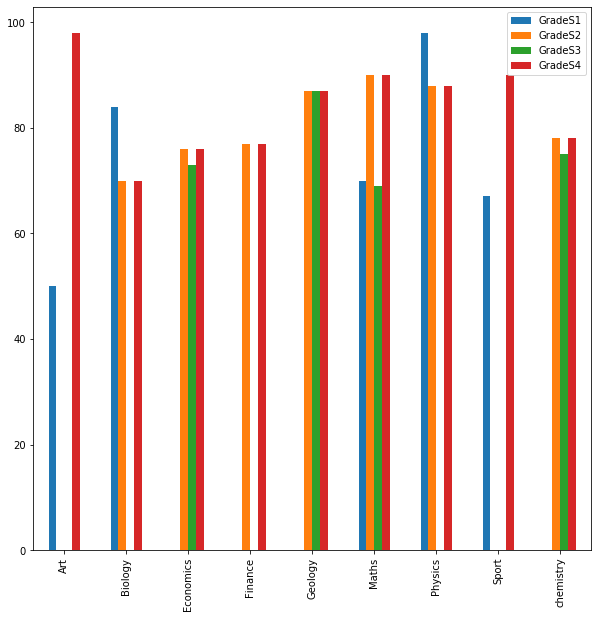

In [ ]:
import matplotlib.pyplot as plt
#data2.plot?
data2.plot(figsize=(10,10), kind= 'bar' )
plt.show()

In [ ]:
data2.plot?F

**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [43]:
def fibi(limit):
    old ,new = 1,2
    total = 0
    while new<limit:
#         print(old,end=' ')
        if new%2 ==0:
            total+=new
        old,new = new,old+new
    return total
print("fibi(4000000)=",fibi(4000000))

fibi(4000000)= 4613732


2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [6]:
dn = []
i = 1
while len(dn) < 1e2:
    dn.append(str(i))
    i += 1
print(dn)
dn = "".join(dn)
print(dn)
#print("d1*d10*d100*d1000*d10000*d100000*d1000000 =  ",int(dn[0]) * int(dn[9]) * int(dn[99]) * int(dn[999]) * int(dn[9999]) * int(dn[99999]) * int(dn[999999]))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100


IndexError: string index out of range

3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [45]:
months = { "January": 31,"February" : 28,"March" : 31,"April" : 30,"May" : 31,"June" : 30,"July" : 31,"August" : 31,"September" : 30,"October" : 31,"November" : 30,"December" : 31}
def NumSun():
    sunday = 0
    day = 1
    for y in range(1901,2001):
        for m in months:
            day = day+months[m]
            if y % 4 == 0 and y%400==0 and m == "February":
                day = day+1
            if day %7==0:
                sunday = sunday+1
    return sunday
print("the number of sundays are",NumSun())

the number of sundays are 171


**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [47]:
def String1(n):
    m = ""
    for i in n:
        if i.isupper():
            m += i.lower()
        if i.islower():
            m+= i.upper()
    return m
# print("String1(Nadine8 Bisanukuri$5) is ",String1("Nadine8 Bisanukuri$5"))

2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [48]:
def UpLow(g):
    m = [0,0]
    for i in g:
        if i.isupper():
            m[1] += 1 
        if i.islower():
            m[0]+=1
    return m
# print("UpLow(Nadine BisanukuLi) is ",UpLow("Nadine BisanukuLi"))

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [49]:
# def Name(s):
#     if s[0].isupper():
#         for i in range(1, len(s) - 1):
#             if s[i].islower():
#                 m = True
#             if s[i].isupper():
#                 return False
#         return m 
#     return False
# Name("Cyizere Nadine ")
def Name(s):
    if UpLow(s)[1] == 1 and s[0].isupper():
        return True
    return False
# print("Name of Kigali rwanda is ",Name("Kigali rwanda"))

4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list element contains a name**. If there are no names on the list please return ``-1``

In [50]:
# def Name2(L):
#     for i in range(len(L)):
#         n=L[i].split(" ")
#         for j in n:
#             if Name(L[i]):
#                 return i
#     return -1
# Name2("nadine", "Azza___h","alomon")
def Name2(L):
    for i in range(len(L)):
        if Name(L[i]):
            return i
    return -1
# print("Name2 of [nadine, Azza,Salomon] is ",Name2(["nadine", "Azza","Salomon"]))

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [51]:
def ma(L):
    b=[]
    for i in range(len(L)):
        if L[i]<0:
            b.append(L[i])
    if len(b)==0:
        return 0
    return max(b)


2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [52]:
def row(M):
    S=0
    for i in M:
        S+=ma(i)
    return S
# row(np.array([[1,-4],[-9,7]]))

3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [53]:
def column(M):
    return row(M.T)
# column(np.array([[1,-4],[-2,-5]]))

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [58]:
from scipy.integrate import quad
a1 = 0
b1= 2
f = lambda x: (x**3+5*x-20)/(x**2+3)
A = quad(f, a1, b1)[0]
print("A=", A)

a2 = 3
b2 = 5
f = lambda x: (x-1/3)*(x**4-3)**(1/2)
B = quad(f, a2, b2)[0]
print("B=", B)

A= -7.049316535735796
B= 124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [59]:
import numpy as np
def Trap(a,b,f,H=0.001):
    N=int((b-a)/H)
    x=np.linspace(a,b,N+1)
    Z=0
    for i in range(1,N+1):
        Z=Z+H*(f(x[i-1])+f(x[i]))/2
    return Z
    

3- Compute the integrales A and B using your function **Trap**

In [37]:
f=lambda x: (x**3+5*x-20)/(x**2+3)
print("A=", Trap(0,2,f))

f = lambda x: (x-1/3)*(x**4-3)**(1/2)
print("B=", Trap(3,5,f))

A= -7.049316458638298
B= 124.40877672379841


**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [62]:
import numpy as np
from scipy.optimize import fsolve
def myFunction(z):
    x = z[0]
    y = z[1]
    F = np.empty((2))
    F[0] = x**2+y+x-4
    F[1] = 2*np.exp(x)+3*y-14
#     F=np.array([F[0],F[1]])
    return F
zGuess = np.array([0,0])
z = fsolve(myFunction,zGuess)
print("x=",z[0])
print("y=",z[1])

x= 5.13108676346246e-16
y= 3.999999999999999


2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [64]:
import numpy as np
A=np.array([[1,-2,-1,6],[2,2,-1,-7],[-1,-1,2,5],[-3,4,2,5]])
b=np.array([4,-4,5,8])
Z=np.linalg.solve(A,b)
print(Z)
print("x=", Z[0])
print("y=", Z[1])
print("z=", Z[2])
print("t=", Z[3])

[1. 1. 1. 1.]
x= 1.0000000000000002
y= 1.0000000000000002
z= 1.0000000000000002
t= 0.9999999999999999


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [65]:
import numpy as np
def EulerMethod(a,b,c,N,f):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    y=np.zeros(N+1)
    y[0]=c
    for i in range(N):
        y[i+1]=y[i]+h*f(x[i],y[i])
    return x,y
        


2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [66]:
import numpy as np
def  RK2Method(a,b,c,N,f):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    y=np.zeros(N+1)
    y[0]=c
    for i in range(N):
        alpha=f(x[i],y[i])
        y[i+1]=y[i]+h*f(x[i]+h/2,y[i]+(h/2)*alpha)
    return x,y
        


3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

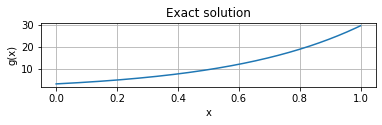

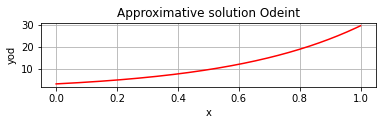

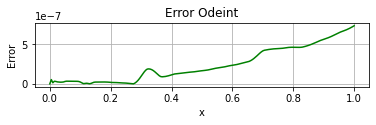

In [67]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# function that returns dy/dt
def Odient(y,x):
    dy_dx = 2*y+np.exp(2*x)
    return dy_dx
# initial condition
y0 = 3
# time points
a = 0
b = 1
N = 200
x = np.linspace(a,b,N+1)
# solve ODE
yod = odeint(Odient,y0,x)
yod=yod.flatten()
g=lambda x: (x+3)*np.exp(2*x)
Errod=abs(yod-g(x))

#Plot Exact solution
plt.subplot(3,1,3)
plt.plot(x,g(x))
plt.grid()
plt.title("Exact solution")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

#Plot Approximative solution Odeint
plt.subplot(3,1,3)
plt.plot(x,yod,"r")
plt.title("Approximative solution Odeint")
plt.xlabel('x')
plt.ylabel('yod')
plt.grid()
plt.show()

#Plot Error Odient
plt.subplot(3,1,3)
plt.plot(x,Errod,"g")
plt.title("Error Odeint")
plt.xlabel('x')
plt.ylabel('Error')
plt.grid()
plt.show()

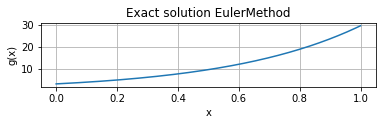

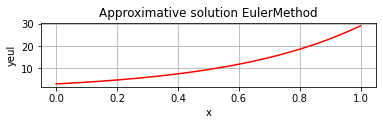

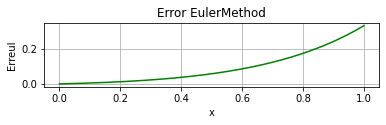

In [68]:
f=lambda x,y: 2*y+np.exp(2*x)

x,yeuler=EulerMethod(0,1,3,200,f)

g=lambda x: (x+3)*np.exp(2*x)
Erreuler=abs(yeuler-g(x))

import matplotlib.pyplot as plt

#Plot Exact solution EulerMethod
plt.subplot(3,1,3)
plt.plot(x,g(x))
plt.title("Exact solution EulerMethod")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()
plt.show()

#Plot Approximative solution EulerMethod
plt.subplot(3,1,3)
plt.plot(x,yeuler,"r")
plt.title("Approximative solution EulerMethod")
plt.xlabel('x')
plt.ylabel('yeul')
plt.grid()
plt.show()

#Plot Error EulerMethod
plt.subplot(3,1,3)
plt.plot(x,Erreuler,"g")
plt.title("Error EulerMethod")
plt.xlabel('x')
plt.ylabel('Erreul')
plt.grid()
plt.show()

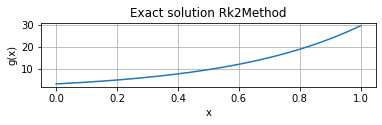

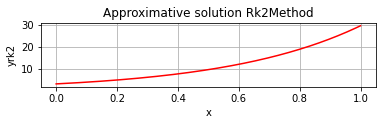

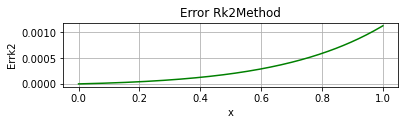

In [69]:
x,yRk2=RK2Method(0,1,3,200,f)

# define the exact solution and write the error
g=lambda x: (x+3)*np.exp(2*x)
Errk2=abs(yRk2-g(x))

import matplotlib.pyplot as plt

#Plot Exact solution Rk2Method
plt.subplot(3,1,3)
plt.plot(x,g(x))
plt.title("Exact solution Rk2Method")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()
plt.show()

#Plot Approximative solution Rk2Method
plt.subplot(3,1,3)
plt.plot(x,yRk2,"r")
plt.title("Approximative solution Rk2Method")
plt.xlabel('x')
plt.ylabel('yrk2')
plt.grid()
plt.show()

#Plot Error Rk2Method
plt.subplot(3,1,3)
plt.plot(x,Errk2,"g")
plt.title("Error Rk2Method")
plt.xlabel('x')
plt.ylabel('Errk2')
plt.grid()
plt.show()

4. Which of the numerical methods used is more efficient? Why?

The odeint method is the most efficient because it converges faster and the error is very small compared to the errors of the other two methods.

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [15]:
# import numpy as np
# def MatGenerator(a,b,lam,alp,beta,N,g):
#     h=(b-a)/N
#     x=np.linspace(a,b,N+1)
#     B=np.zeros(N+1)
#     B[0]=g(x[0])+alp*(lam**2/h**2)
#     B[N]=g(x[N])+beta*(lam**2/h**2)
#     for i in range(1,N):
#         B[i]=g(x[i-1])
#     A=(lam**2/h**2)*(-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1))
#     return A,B
import numpy as np
def MatGenerator(a,b,lam,alp,beta,N,g):
    B=np.zeros(N+1)# create vector b
    B[0]=alp
    B[N]=beta## specify firat and last elements in b
    h=(b-a)/N
    x=np.linspace(a,b,N+1)

    B[1:N]=(h**2/lam**2)*g(x[1:N])##extracts mid elements of b and replaces them with g(x_i)
  
    A=np.eye(N+1,N+1)# creates matrics
    A[1,0]=-1
    A[N-1,N-1]=-1
    A[1:N,1:N]=-np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

[-4.         -3.99979785 -3.99918765 -3.9981612  -3.99671021 -3.99482623
 -3.99250073 -3.989725   -3.98649024 -3.9827875  -3.97860771 -3.97394163
 -3.96877993 -3.96311311 -3.95693154 -3.95022545 -3.94298491 -3.93519986
 -3.92686009 -3.91795523 -3.90847477 -3.89840804 -3.88774421 -3.87647229
 -3.86458114 -3.85205945 -3.83889574 -3.82507839 -3.81059557 -3.79543531
 -3.77958546 -3.76303367 -3.74576746 -3.72777412 -3.70904078 -3.68955439
 -3.66930171 -3.64826929 -3.62644352 -3.60381056 -3.58035641 -3.55606683
 -3.5309274  -3.50492351 -3.4780403  -3.45026273 -3.42157554 -3.39196325
 -3.36141016 -3.32990036 -3.2974177  -3.26394581 -3.22946808 -3.19396767
 -3.15742752 -3.11983031 -3.08115849 -3.04139424 -3.00051952 -2.95851603
 -2.9153652  -2.87104821 -2.82554598 -2.77883917 -2.73090816 -2.68173306
 -2.6312937  -2.57956963 -2.52654014 -2.4721842  -2.41648051 -2.35940747
 -2.30094317 -2.24106543 -2.17975173 -2.11697926 -2.05272489 -1.98696517
 -1.91967634 -1.8508343  -1.78041463 -1.70839257 -1

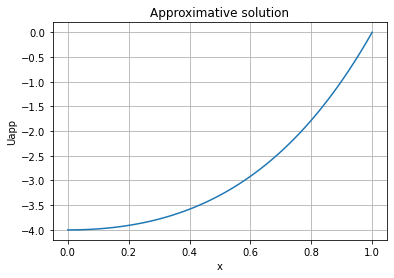

In [16]:
g=lambda x: -4*(1+x)*np.exp(x)
A,B=MatGenerator(0,1,1,-4,0,100,g)
U=np.linalg.solve(A,B)
print(U)
x=np.linspace(0,1,101)
import matplotlib.pyplot as plt
plt.plot(x,U)
plt.title("Approximative solution")
plt.xlabel('x')
plt.ylabel('Uapp')
plt.grid()
plt.show()

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [72]:

import Group9 as gp
print(gp.fibi(4000000))


4613732


In [73]:
print(gp.NumSun())

171


In [80]:
print("The String1 of Nadine8 Bisanukuri$5 is",{gp.String1("Nadine8 Bisanukuri$5")})


The String1 of Nadine8 Bisanukuri$5 is {'nADINEbISANUKURI'}


In [81]:
print("The UpLow of Nadine8 Bisanukuri$5 is", gp.UpLow('Nadine8 Bisanukuri$5'))


The UpLow of Nadine8 Bisanukuri$5 is [14, 2]


In [82]:
print("The Name of Nadine8 isanukuri$5",gp.Name('Nadine8 isanukuri$5'))


The Name of Nadine8 isanukuri$5 True


In [77]:
print(gp.Name2('Nadine8 bisanukuri$5'))


0


In [78]:
print(gp.ma([-5,2,3,7,8,5,-2]))


-2


In [15]:
print(gp.row([[1,-6],[4,-1]]))


-7


In [16]:
print(gp.column(np.array([[-5,-8],[-9,3]])))


-13


In [17]:
f=lambda x: (x**3+5*x-20)/(x**2+3)
print(gp.Trap(0,2,f))


-7.049316458638298


In [18]:

f=lambda x,y: 2*y+np.exp(2*x)
print(gp.EulerMethod(0,1,3,200,f))


(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635

In [22]:
zGuess = np.array([0,0])
z = fsolve(myFunction,zGuess)
print(gp.myFunction(z))

[-4.44089210e-16 -3.55271368e-15]


In [20]:
# print(gp. RK2Method())
g=lambda x: -4*(1+x)*np.exp(x)
print(gp.MatGenerator(0,1,1,-4,0,100,g))


(array([[ 20000., -10000.,      0., ...,      0.,      0.,      0.],
       [-10000.,  20000., -10000., ...,      0.,      0.,      0.],
       [     0., -10000.,  20000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ...,  20000., -10000.,      0.],
       [     0.,      0.,      0., ..., -10000.,  20000., -10000.],
       [     0.,      0.,      0., ...,      0., -10000.,  20000.]]), array([-4.00040000e+04, -4.00000000e+00, -4.08060268e+00, -4.16242147e+00,
       -4.24547268e+00, -4.32977282e+00, -4.41533860e+00, -4.50218696e+00,
       -4.59033502e+00, -4.67980013e+00, -4.77059988e+00, -4.86275204e+00,
       -4.95627463e+00, -5.05118590e+00, -5.14750429e+00, -5.24524852e+00,
       -5.34443752e+00, -5.44509044e+00, -5.54722670e+00, -5.65086595e+00,
       -5.75602808e+00, -5.86273324e+00, -5.97100181e+00, -6.08085445e+00,
       -6.19231205e+00, -6.30539579e+00, -6.42012708e+00, -6.53652764e+00,
       -6.65461941e+00, -6.77442464e+00, -6.89596584

In [ ]:
pwd

'/home/nadine/Desktop/PPQ2'

In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

**Exercise 1** **<font color='red'> 4/4 </font>**

1- Write a function, **ReverCase**, that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

Test your function **ReverCase**.

In [ ]:
#4pt
def ReverCase(s):
    t = ""
    for i in s:
        if i.isupper():
            t += i.lower()
        if i.islower():
            t += i.upper()
    return t
print("ReverCase(Nadine Bisa345& Cyizere) = ",ReverCase("Nadine Bisa345& Cyizere"))

ReverCase(Nadine Bisa345& Cyizere) =  nADINEbISAcYIZERE


2- Write a function,**MaxNegMat** , that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Test your function **MaxNegMat**

<font color=red> (4/4) </font>

In [ ]:
#4pt
def neg(x):
    b = []
    for ne in x:
        if ne < 0:
            b.append(ne)
    if len(b) == 0:
        return 0
    return max(b)

def MaxNegMat(M):
    som = 0
    for i in range(len(M)):
        som += neg(M[i])
    return som
print("MaxNegMat([[-2,5],[-7,1],[-5,-1]]) = ", MaxNegMat([[-2,5],[-7,1],[-5,-1]]))

MaxNegMat([[-2,5],[-7,1],[-5,-1]]) =  -10


**Exercise 2<font color=red> (5/5) </font>**

1-The cost of admission to a popular music concert was 
- 40 USD for 1 children and 1 male
- 170 USD  for 4 children, 2 females and 3 males 
- 190 USD  for 5 children, 4 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

#2pt\
x = Children, y = Female, z = Male
\begin{equation}
\begin{cases}
    x + z = 40\\
    4x + 2y + 3z = 170\\
    5x + 4y + 2z = 190
\end{cases}
\end{equation}

2- Write a Python code to compute and display how much was the admission for each child, female and male?

In [ ]:
#3pt
A = np.array([[1, 0, 1], [4, 2, 3], [5, 4, 2]])
b = np.array([40, 170, 190])
x, y, z = np.linalg.solve(A,b)
print("x = ", x, "y = ", y, "z = ", z)

x =  9.999999999999996 y =  20.000000000000004 z =  30.000000000000007


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    x^2 + x = 2 - y\\
    2e^x + 3y = 8
\end{cases}
\end{equation}

<font color=red> 5/5 </font>

In [ ]:
#5pt
def myfunction(z):
    x = z[0]
    y = z[1]
    
    F = np.empty((2))
    F[0] = x**2 + x + y - 2
    F[1] = 2*np.exp(x) + 3*y - 8
    return F

z_g = np.array([1,1])
z = fsolve(myfunction, z_g)
print("x = ", z[0], "y = ", z[1])

x =  -3.5025076898226905e-12 y =  2.000000000000468


**Exercise 3** <font color=red> (6.5/9) </font>

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

<font color=red> (4/4) </font>

In [ ]:
#4pt
f_a = lambda x : (x**3 + 5*x - 20) / (x**2 + 3)
A = quad(f_a, 0, 2)
f_b = lambda x : (x - (1/3)) * np.sqrt(x**4 - 3)
B = quad(f_b, 3, 5)
print("A = ", A[0], "B = ", B[0])

A =  -7.049316535735796 B =  124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

<font color=red>(2.25/3) </font>

<font color=red>Your definition of the summation Z is wrong </font>

In [ ]:
#3pt
def Trap(a, b, f, H = 0.001):
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    Z = 0
    for i in range(1, N+1):
        Z += H*(x[i-1] + x[i])/2
    return Z

3- Compute the integrales A and B using your function **Trap**

<font color=red>(0.25/2) </font>

In [ ]:
#2pt
f_A = lambda x : (x**3 + 5*x - 20) / (x**2 + 3)
A_2 = Trap(0,2,f_A)
f_B = lambda x : (x - 1/3) * np.sqrt(x**4 - 3)
B_2 = Trap(3,5,f_B)
print("A = ",A_2, "B = ", B_2)

A =  1.9999999999999998 B =  8.0


**Exercise 4** <font color=red>(21/21) **_Excellent_** </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

In [ ]:
#5pt
def function(z, x):
    y,v = z
    dydx = v
    dvdx = -2*v + 30 *( np.exp(3*x))
    return np.array([dydx, dvdx])

def SODA(a, b, H = 0.001):
    yi = np.array([2, 8])
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    solution = odeint(function , yi, x)
    return x, solution[:,0],

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

Text(0, 0.5, 'yk')

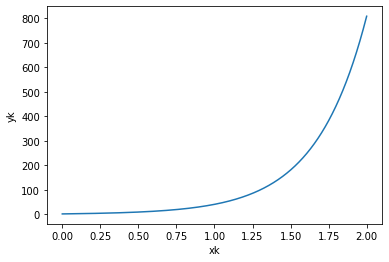

In [ ]:
#4pt
z = SODA(0, 2)
xk = z[0]
yk = z[1]
plt.plot(xk,yk)
plt.xlabel('xk')
plt.ylabel('yk')

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

Text(0, 0.5, 'abs(yk - gk(xk)')

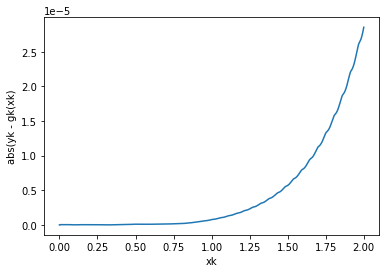

In [ ]:
#3pt
gk = lambda x : 2 * np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(xk, abs(yk - gk(xk)))
plt.xlabel('xk')
plt.ylabel("abs(yk - gk(xk)")

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_{k = 0}^N H(y_k - g_k)^2$$

In [ ]:
#3pt h:vecotrization
def L2_error(a, b, H):
    YK = SODA(a,b,H)[1]
    GK = gk(SODA(a,b,H)[0])
    N = int((b-a)/H)
    total = 0
    for i in range(0, N+1):
        total += (H*(YK[i] - GK[i])**2)
    return total

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [ ]:
#3pt
H = np.array([10**(-1),10**(-2),10**(-3),10**(-4)])
𝐿2𝐸𝑟𝑗 = np.array([L2_error(0, 2, 10**(-1)),L2_error(0, 2, 10**(-2)),L2_error(0, 2, 10**(-3)), L2_error(0, 2, 10**(-4))])
print("𝐿2𝐸𝑟𝑗 = ", 𝐿2𝐸𝑟𝑗)

𝐿2𝐸𝑟𝑗 =  [1.76688197e-10 1.34088211e-10 1.29754197e-10 1.31295082e-10]


5- Plot the array of $L2Er_j$ against the array of $H_j$.

Text(0, 0.5, 'L2Erj')

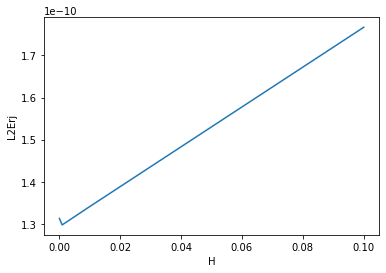

In [ ]:
#3pt
# add in some linear regration
plt.plot(H,𝐿2𝐸𝑟𝑗,"o")
plt.xlabel('H')
plt.ylabel("L2Erj")

In this session, we will demonstrate various techniques for visualising data using both `matplotlib` and `pandas`. This will also include the correct interpretation and understanding of the different plotting techniques. The data to be used are `flight_data.csv` and `weather.csv`. They can both be found in the folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flight_data.csv')

In [3]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
df.shape

(336776, 19)

To reduce the amount of data we will be working with and make things a little easier, lets only look at _Alaska Airlines_ flights leaving from New York City in 2013. This can be done by subsetting the data in such a way that we only observe flights from Alaska Airlines (carrier code AS), as follows;

In [5]:
Alaska = df[df['carrier'] == 'AS']

This essentially picks out all of the rows within the flights data set for which the carrier code is AS and discards the rest, thus creating a new data set entitled Alaska. To observe the Alaska data we can use the following commands:

In [6]:
Alaska.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
78,2013,1,1,724.0,725,-1.0,1020.0,1030,-10.0,AS,11,N594AS,EWR,SEA,338.0,2402,7,25,1/1/2013 7:00
644,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402,18,15,1/1/2013 18:00
949,2013,1,2,722.0,725,-3.0,949.0,1030,-41.0,AS,11,N592AS,EWR,SEA,314.0,2402,7,25,2/1/2013 7:00
1573,2013,1,2,1818.0,1815,3.0,2131.0,2130,1.0,AS,7,N552AS,EWR,SEA,332.0,2402,18,15,2/1/2013 18:00
1894,2013,1,3,724.0,725,-1.0,1012.0,1030,-18.0,AS,11,N533AS,EWR,SEA,325.0,2402,7,25,3/1/2013 7:00


In [7]:
Alaska.shape

(714, 19)

# Visualising the data 
## Scatterplots
This allows us to examine if there is any relationship between two variables, such as positive or negative correlation, and whether the relationship appears linear or not. Lets say we wanted to observe the relationship between departure and arrival delays. We can do that as follows:

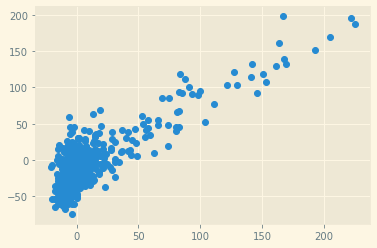

In [8]:
plt.style.use('Solarize_Light2')
plt.scatter('dep_delay', 'arr_delay', data=Alaska); 

## Adding labels to the axes

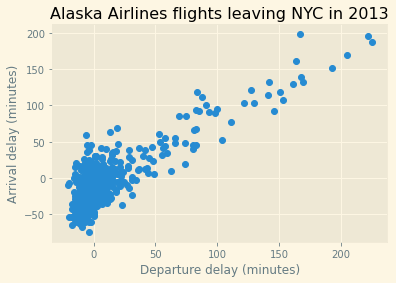

In [9]:
plt.scatter('dep_delay', 'arr_delay', data=Alaska)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

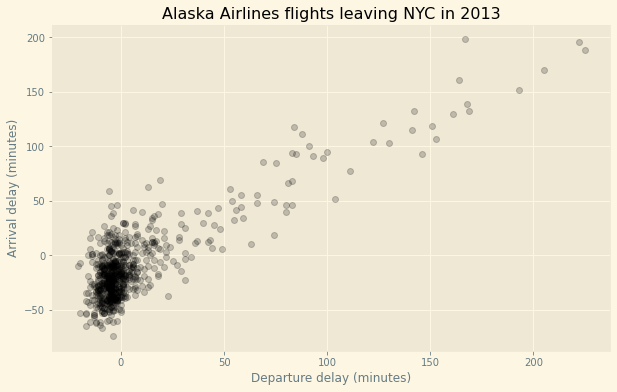

In [10]:
plt.figure(figsize=(10,6))
plt.scatter('dep_delay', 'arr_delay', data=Alaska, color='k', alpha=0.2)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

### Something to think about.
1. Why do departure and arrival delays appear to have a positive relationship?
2. Why is there a cluster of points at (0,0)? What does this indicate?

## Histograms
Histograms allow us to look at the statistical distribution of a variable. They show us how many values of a variable fall within specified bins. These bins give ranges of values for which the variable lies. The bins can be altered, that is, by changing their width, or by increasing the number of bins, such that we see the distribution at a higher resolution. Here, lets take a look at the weather data set. This data set contains hourly weather data from three airports (LGA, JFK and EWR) in New York City in 2013. 

In [11]:
weather = pd.read_csv('weather.csv')
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


Now, let us see  the distribution of the hourly temperature:

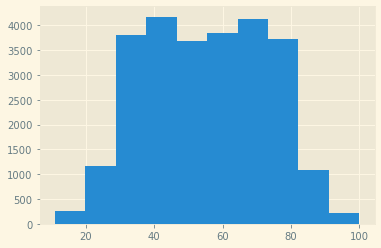

In [12]:
plt.hist(weather['temp']);

As mentioned earlier, we can view histogram as a higher resolution by increasing the number of bins.

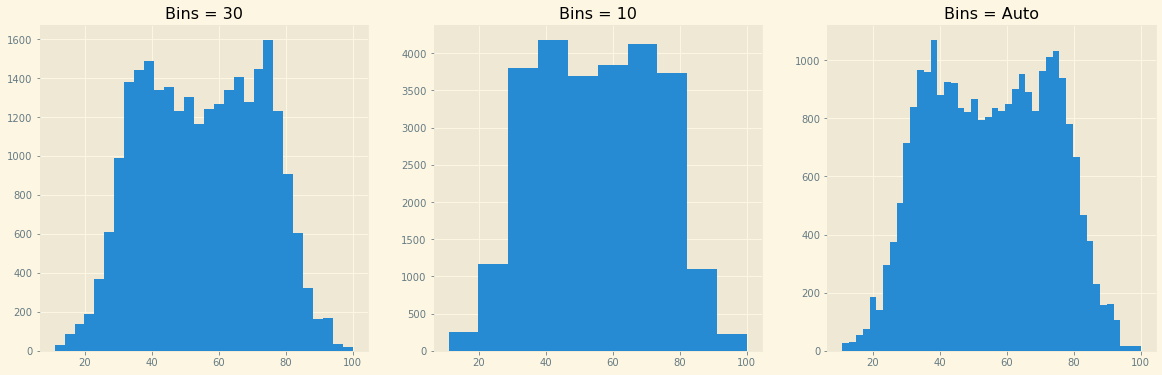

In [13]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Bins = 30')
weather['temp'].hist(bins=30)

plt.subplot(1,3,2)
plt.title('Bins = 10')
weather['temp'].hist(bins=10)

plt.subplot(1,3,3)
plt.title('Bins = Auto')
weather['temp'].hist(bins='auto')

plt.show()

Finally, let us plot a histogram with more information.

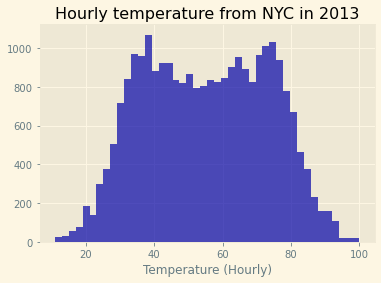

In [14]:
plt.style.use('Solarize_Light2')
plt.hist(weather['temp'], bins='auto', color='#0504aa', alpha=0.7)
plt.xlabel('Temperature (Hourly)')
plt.title('Hourly temperature from NYC in 2013')
plt.show()

### Something to think about
3. What does the histogram tell us about the hourly temperature levels from NYC in 2013?

## Boxplot
Another way to look at the distribution of a variable is using a boxplot. A boxplot makes use of the standard five-number summary, that is

* the minimum value;
* the first quartile or 25th percentile;
* the median (or 2nd quartile / 50th percentile);
* the third quartile or 75th percentile;
* and the maximum value.

Keeping with the hourly temperature data, the five-number summary can be obtained by using the following command:

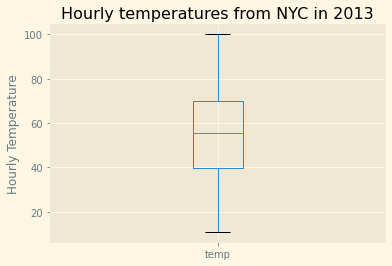

In [15]:
weather.boxplot('temp')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
plt.show()

We could look at how the hourly temperature changes by month:

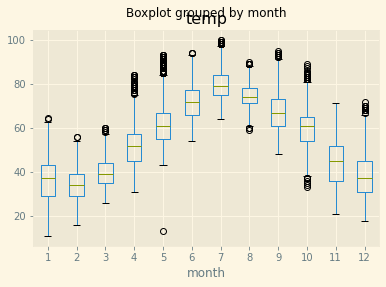

In [16]:
weather.boxplot('temp', by='month');

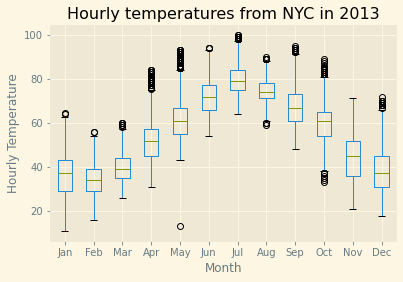

In [17]:
weather.boxplot('temp', by='month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(list(range(1, 13)), months);

### Something to think about
4. Which months have the highest variability in temperature?

## Barplots
Barplots, or barcharts, are used to visualise the distributions of categorical variables. This essentially provides us with the frequencies of categories within a categorical variable. Lets take a look at the distribution of airline carriers within the flights data that flew out of New York City in 2013. We can do this by creating a table containing the number of flights from each airline carrier as follows:

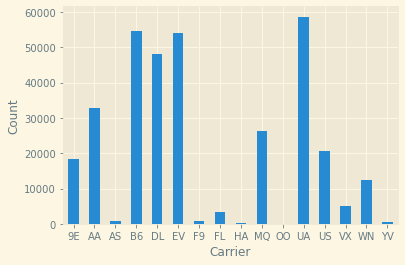

In [18]:
df.groupby('carrier').size().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

Barplots can also be used to compare two categorical variables. For instance, lets say we wanted to look atthe number of flights that flew out of New York York in 2013 from each carrier and from each airport (LGA, JFK and EWR). 

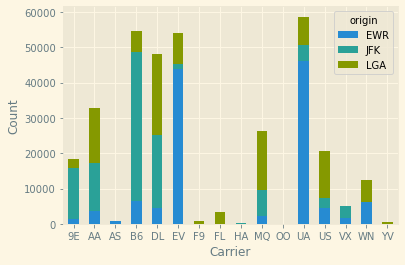

In [19]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

This provides us with a visually nice barplot to present our carrier information by airport of origin. However,there are also alternative barplots to the stacked barplot.  One alternative to a stacked barplot is theside-by-side(ordodged)barplot, which, as suggested by its name, places the bars next to each anotherinstead of on top of one another. This can be produced as follows

#### Faceted barplot

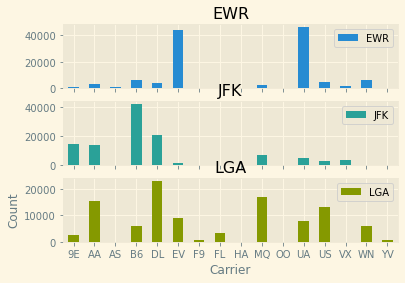

In [20]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', subplots=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

#### side-by-side barplot

Text(0, 0.5, 'Count')

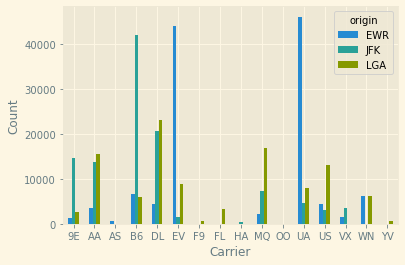

In [21]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count')

Linegraphs are typically used when looking at _time series_ data, that is, when we have information on how a variable changes over time. Hence, there is a natural ordering to the data when observing how something changes over time, and therefore, linegraphs should be avoided if there is no sequential ordering of a variable. Lets again look at the hourly temperature data, but this time only for Newark International Airport in January. This can be done by first subsetting the data as follows:

In [22]:
Newark_Jan = weather[(weather['origin'] == 'EWR') & (weather['month'] == 1)]
Newark_Jan

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,EWR,2013,1,31,19,33.08,15.08,47.10,270.0,20.71404,31.07106,0.0,1006.6,10.0,2013-02-01T00:00:00Z
738,EWR,2013,1,31,20,32.00,19.04,58.37,250.0,17.26170,26.46794,0.0,1007.3,10.0,2013-02-01T01:00:00Z
739,EWR,2013,1,31,21,32.00,10.04,39.38,260.0,28.76950,36.82496,0.0,1008.0,10.0,2013-02-01T02:00:00Z
740,EWR,2013,1,31,22,30.92,6.98,35.84,260.0,27.61872,35.67418,0.0,1008.5,10.0,2013-02-01T03:00:00Z


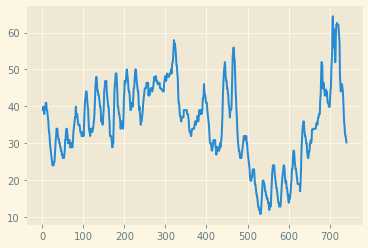

In [23]:
plt.plot(Newark_Jan['temp']);

## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often have to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

### Installing with pip <br>
`pip install seaborn`

### Installing with conda <br>
`conda install seaborn`

### import

In [1]:
pwd

'C:\\Users\\HOVE\\Desktop\\Vizualization'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [4]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Michelle Samms,F,46,NY,17-BY3613DX,Laptop,609.99,140.34,Flyer 3,November,2019
98,99,Mick Roberts,M,23,PA,BB980,Desktop,889.99,110.89,Flyer 2,May,2019
99,100,Ed Klondike,M,52,OH,15M-ED0023DX,Laptop,989.99,111.34,Email,November,2019
100,101,Moe Eggert,M,35,PA,GMA4000BST,Desktop,589.99,138.64,Website,May,2019


In [6]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

### Distribution Plot

<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

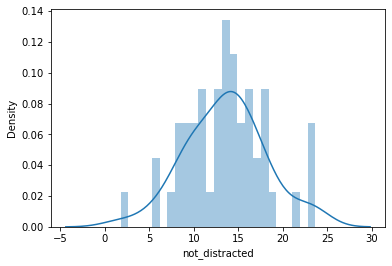

In [7]:
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

### Joint Plot

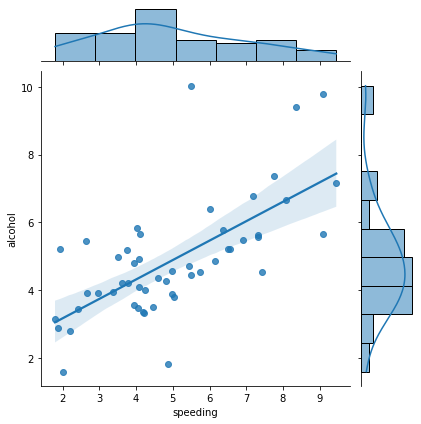

In [8]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

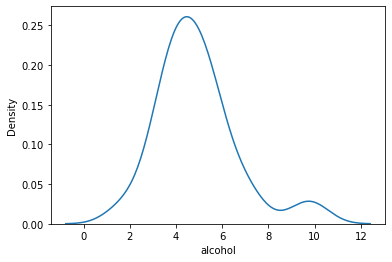

In [9]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

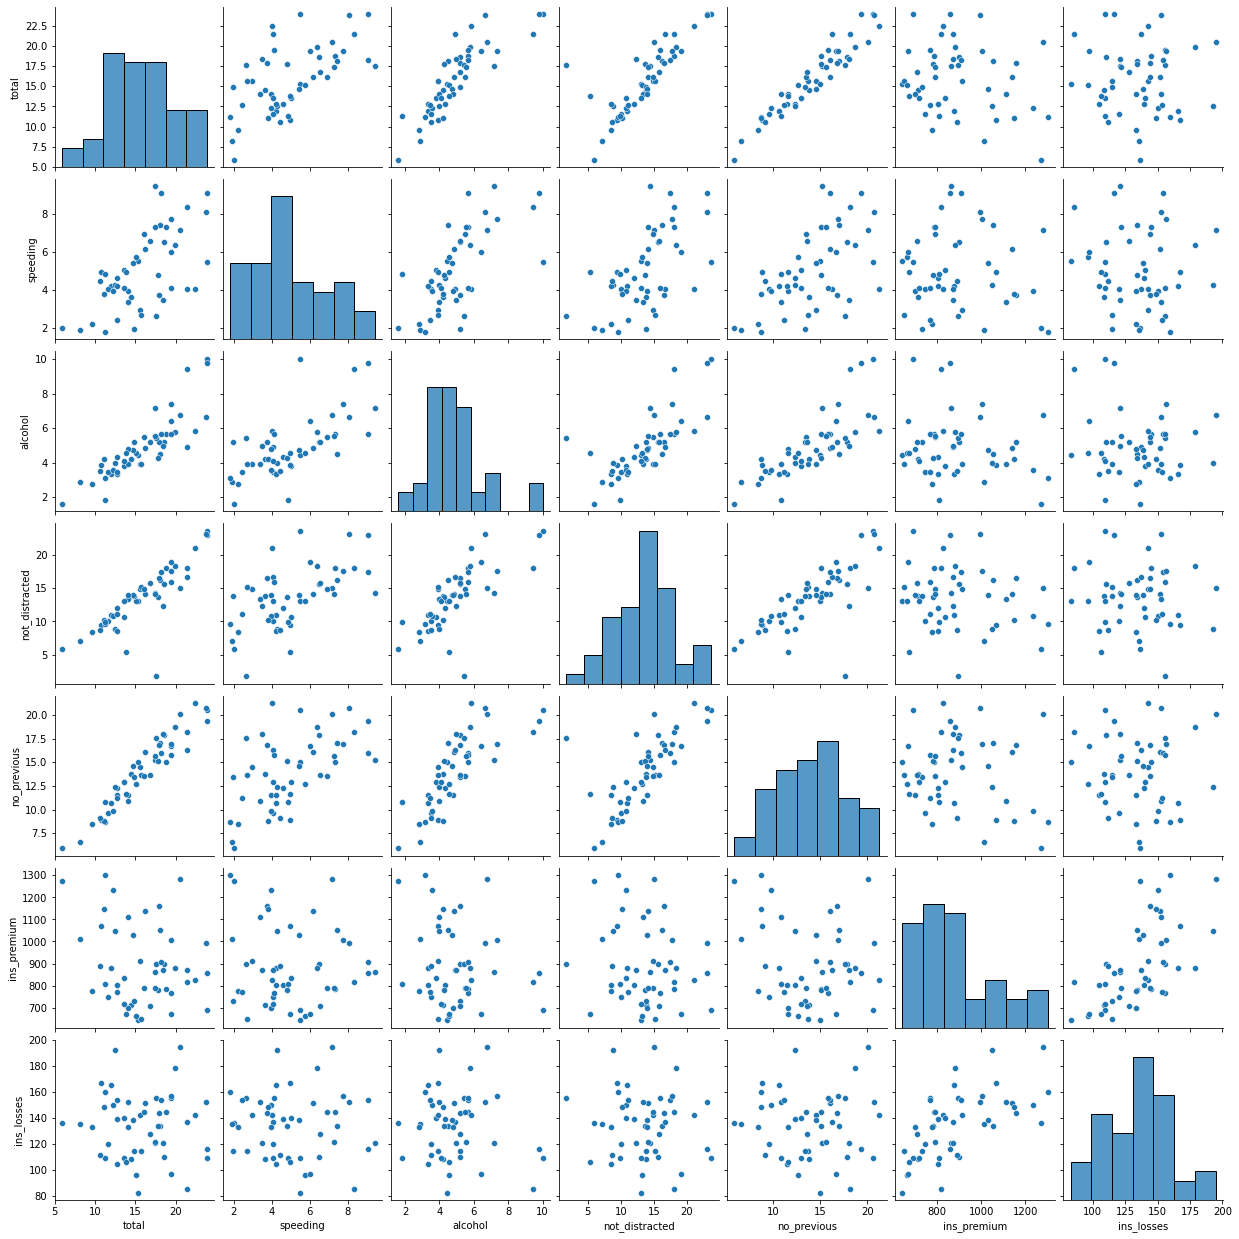

In [10]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

### Styling

<Figure size 576x288 with 0 Axes>

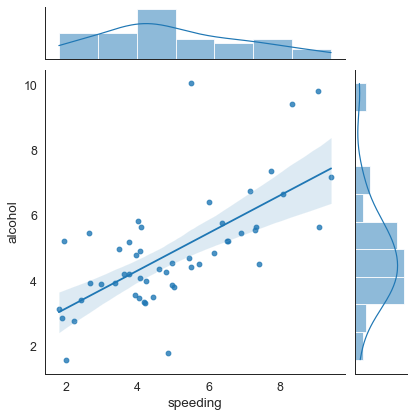

In [11]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

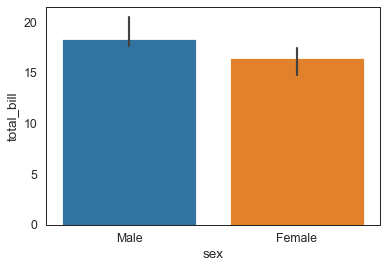

In [12]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

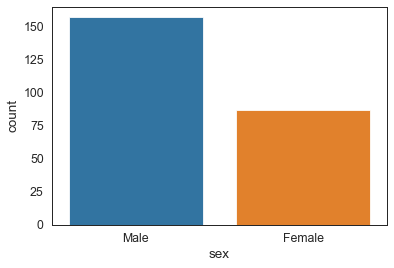

In [13]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)

### Box Plot

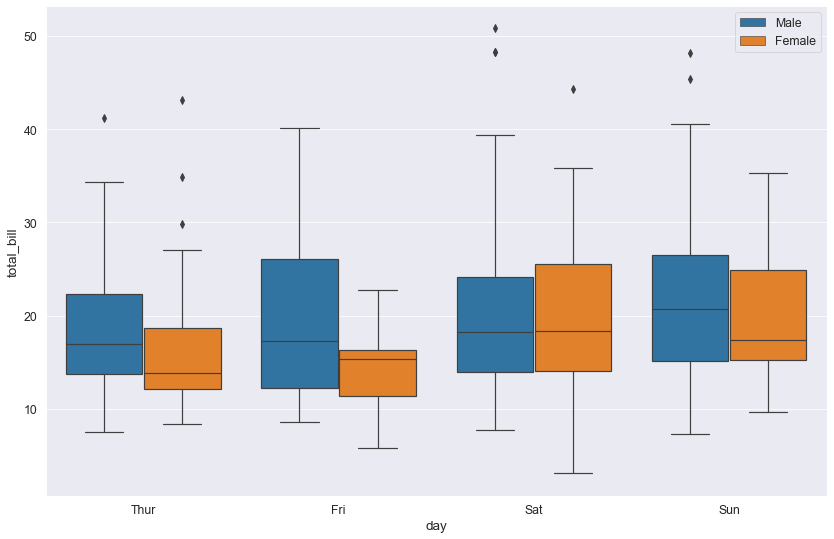

In [14]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

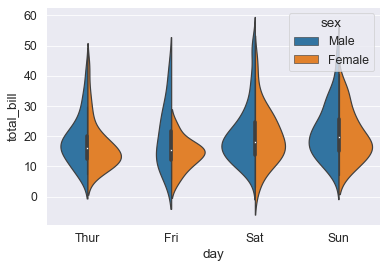

In [15]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

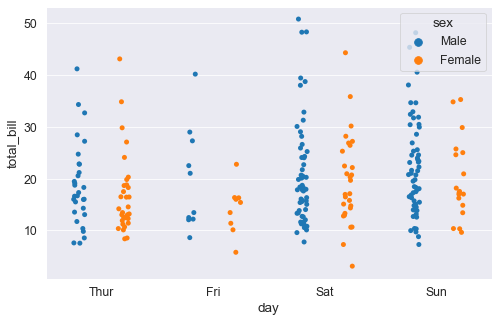

In [16]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

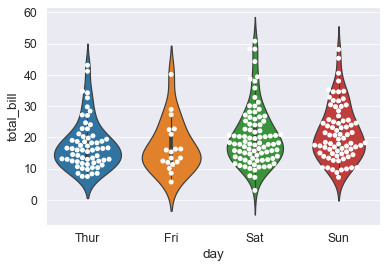

In [17]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

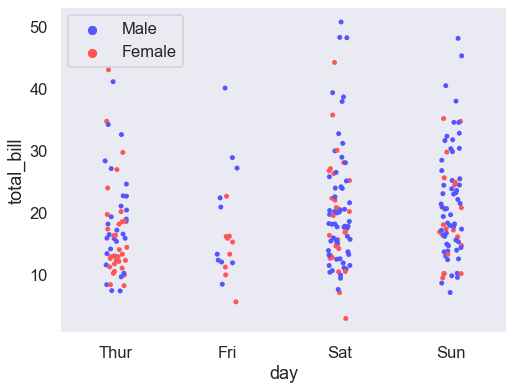

In [18]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

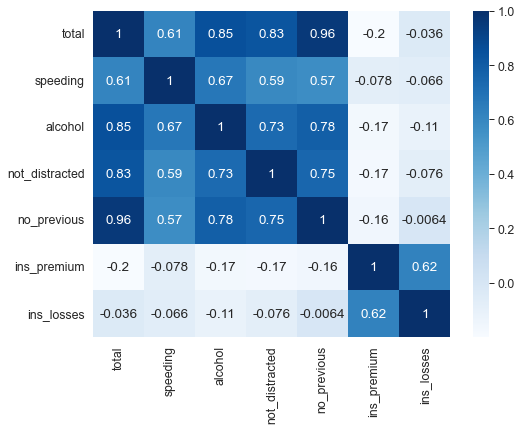

In [20]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

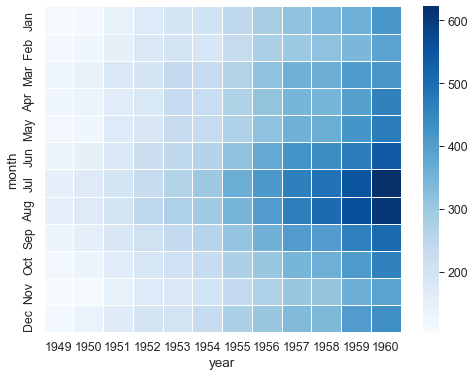

In [21]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

### Cluster Map

<Figure size 576x432 with 0 Axes>

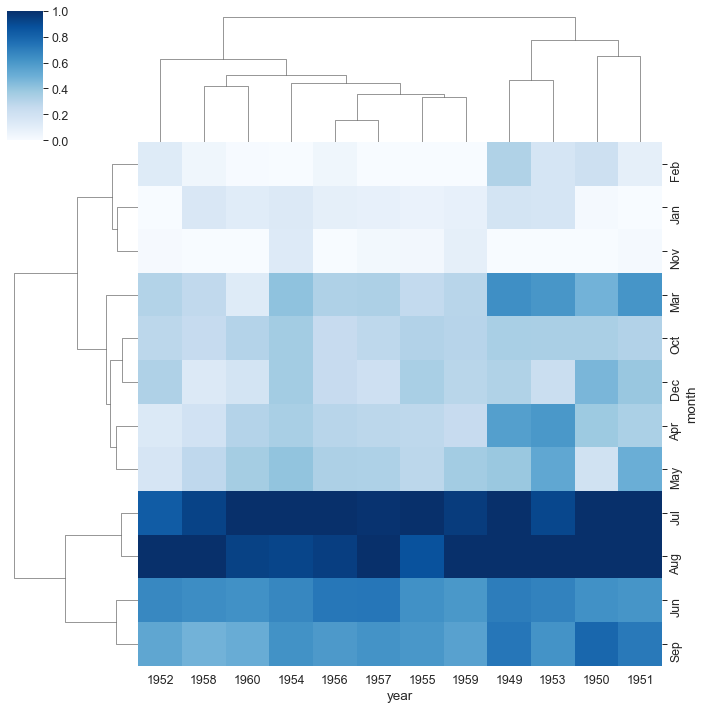

In [22]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


### PairGrid

<Figure size 576x432 with 0 Axes>

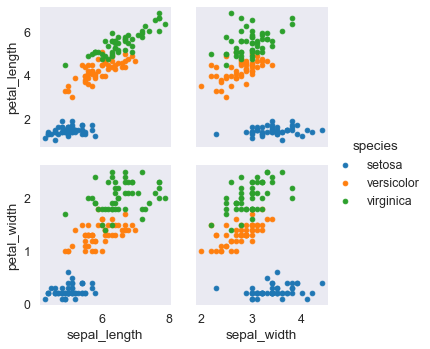

In [24]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend();

### Facet Grid

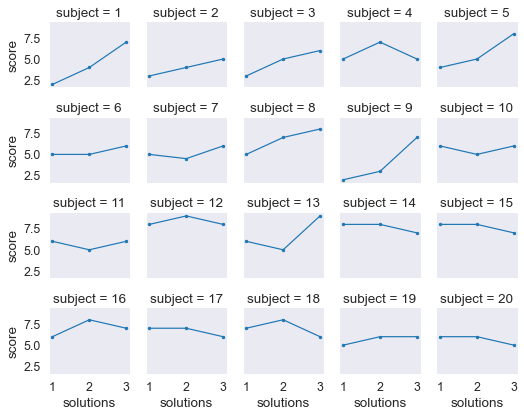

In [27]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

### Regression Plots

In [28]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

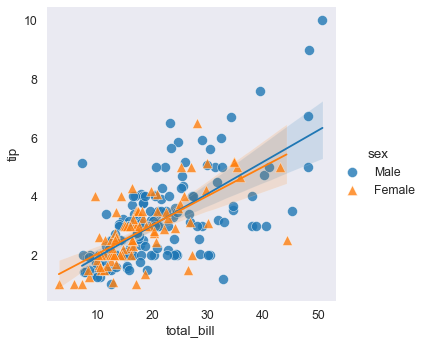

In [32]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

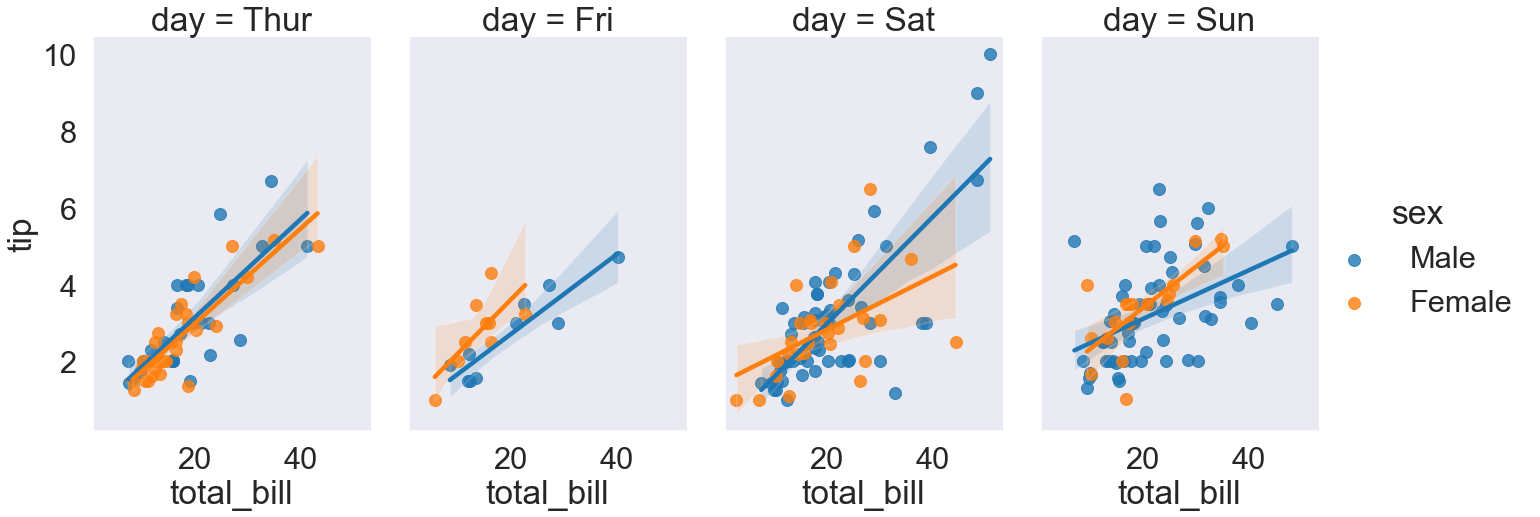

In [34]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);

In [1]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# 1. Introduction
Supervised learning use cases examples

- How much will be the daily, monthly, and yearly sales for agiven store for the next three years?
- How many car parking spaces should be allocated for a retail store?
- How much will be my monthly electricity cost for the next three years?
- What will be the temperature for the next five days?

The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [2]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


In [3]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


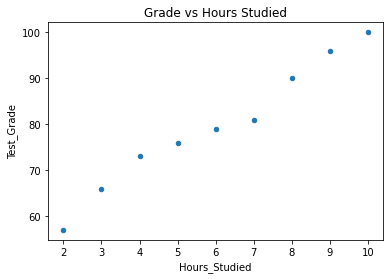

In [4]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that <b>the grade gradually increases with the increase in hours of study</b>. 

This implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [5]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

,PythonMark,ReviewPhaseMark
0,6,6
1,5,6
2,8,10
3,14,15
4,10,10


In [6]:
df.corr()

,PythonMark,ReviewPhaseMark
PythonMark,1.000000,0.904868
ReviewPhaseMark,0.904868,1.000000


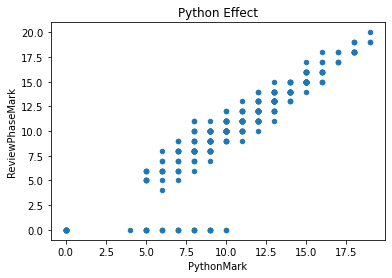

In [7]:
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

In [8]:
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable


In [9]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)


alpha =  1.1096258969443358
beta =  -1.4936733199830208


In [11]:
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


R-squared: 0.79
mean absolute error: 1.21
Mean squared error: 4.22


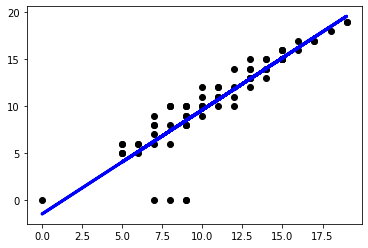

In [12]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


### 2.3.  Multivariate Linear regression ($m>1$)

Let us consider the following data

In [13]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
print(maths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

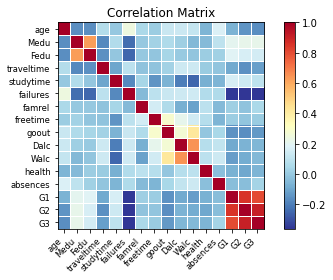

In [15]:
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [16]:
maths.sex.unique()#this is a categorical variable

array(['F', 'M'], dtype=object)

In [17]:
maths.famsize.unique()#this is a categorical variable

array(['GT3', 'LE3'], dtype=object)

<b>Note that sklearn can only accept numerical inputs</b>.

### 2.3.1. Pre-processing of labeled data
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.

- <b>LabelBinarizer</b>: This will replace the binary variable text withvnumeric vales. We'll be using this function for the binary categorical variables.

- <b>LabelEncoder</b>: This will replace category level with number representation.

- <b>OneHotEncoder</b>: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling <b>OneHotEncoder</b>, we should use <b>LabelEncoder</b> to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [18]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

array([0, 1])

In [19]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

array([0, 1])

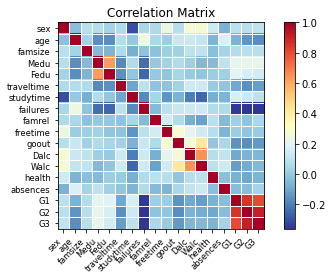

In [20]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



In [21]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

In [22]:
# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

LinearRegression()

In [23]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

The R-Squared:  0.7983552161587196
sex :  0.16476928111566563
famsize :  -0.020837379216875864
studytime :  -0.043940699688089634
famrel :  0.3631349649085571
absences :  0.04105103296124567
G1 :  0.15698723303548884
G2 :  0.9987849801717963
The intercept of our slope is:  -3.683923561369623


In [24]:
MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

Mean Absolute Error: 1.3100825502382831
Mean Squared Error: 4.134735824024409
Root Mean Squared Error: 2.0334049827873466


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [5]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

,Test,Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
21,Iris-versicolor,Iris-versicolor,0.01,0.71,0.28
14,Iris-versicolor,Iris-versicolor,0.00,0.71,0.29
12,Iris-versicolor,Iris-versicolor,0.00,0.79,0.20
4,Iris-setosa,Iris-setosa,0.97,0.03,0.00
35,Iris-versicolor,Iris-versicolor,0.05,0.88,0.07
11,Iris-versicolor,Iris-versicolor,0.01,0.81,0.18
20,Iris-virginica,Iris-virginica,0.00,0.19,0.81
24,Iris-virginica,Iris-virginica,0.00,0.43,0.57
36,Iris-setosa,Iris-setosa,0.94,0.06,0.00
23,Iris-setosa,Iris-setosa,0.98,0.02,0.00


In [6]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


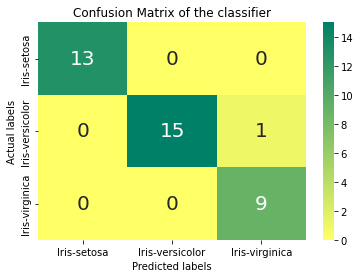

In [7]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [8]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158
